# Problem Statement

In order to efficiently manage the business and manpower for the coming months, the ABC airlines want to forecast the number of bookings expected for the next two quarters. You are provided with the data for past 19 months (from 26-08-2012 to 25-03-2014) and you have to forecast the values for the next two quarters (26-03-2014 to 25-09-2014).

_Note that here we will be using a validation set and hence we have the forecast values for the next two quarters_


**Data Description**
Both data and validation files have two columns: 'Date' and 'Count'.
- Date: Store the date when the observation was taken
- Count: Holds the number of bookings for the given date

# Reading Time Series Data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

c:\users\prashant\anaconda3\envs\dl38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\prashant\anaconda3\envs\dl38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\prashant\anaconda3\envs\dl38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [3]:
data = pd.read_csv("../train_data.csv")

In [4]:
data.shape

(534, 2)

In [5]:
data.head()

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


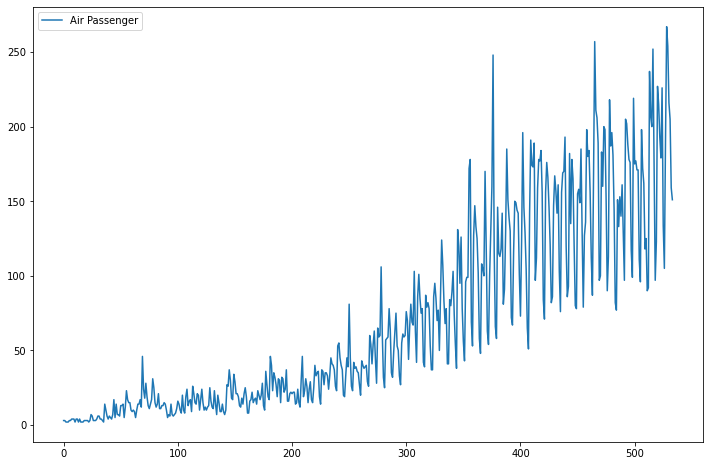

In [6]:
plt.figure(figsize=(12,8))

plt.plot(data.index, data['count'], label='Air Passenger')
plt.legend(loc='best')
plt.show()

In [7]:
data.dtypes

Date     object
count     int64
dtype: object

# Convert the object to datetime format

The format depends on your data. Here are a few examples

    1/12/2001: %d/%m/%Y
    2001/12/1: %Y/%m/%d
    2001-12-01: %Y-%m-%d
    2001-12-01 09:00: %Y-%m-%d %H:%M

In [12]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [13]:
data.dtypes

Date     datetime64[ns]
count             int64
dtype: object

In [14]:
data['Date'].min(), data['Date'].max()

(Timestamp('2012-08-25 00:00:00'), Timestamp('2014-02-09 00:00:00'))

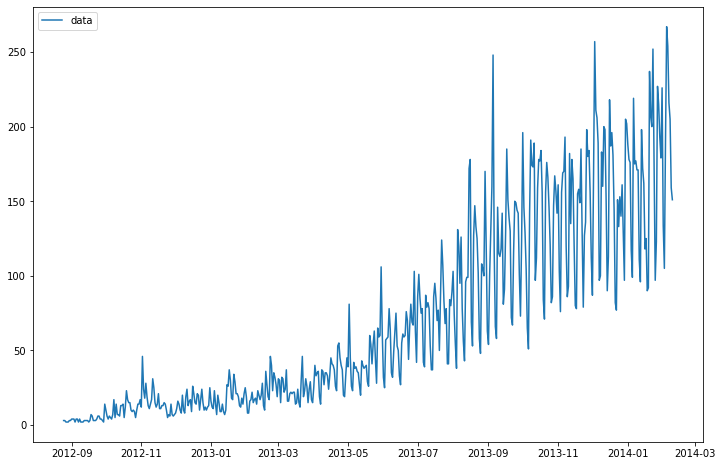

In [15]:
plt.figure(figsize=(12,8))

plt.plot(data.Date, data['count'], label='data')
plt.legend(loc='best')
plt.show()

# Challenges with time series data
1. Randomly Shuffled Data
2. Multiple formats of Date

In [38]:
data_shuffle = pd.read_csv('data/data_suffled.csv')

In [39]:
data_shuffle.head()

,Date,count
0,2013-03-23,19
1,2013-03-05,31
2,2013:07:28,41
3,2012:12:27,12
4,2013-07-29,84


In [40]:
data_shuffle.dtypes

Date     object
count     int64
dtype: object

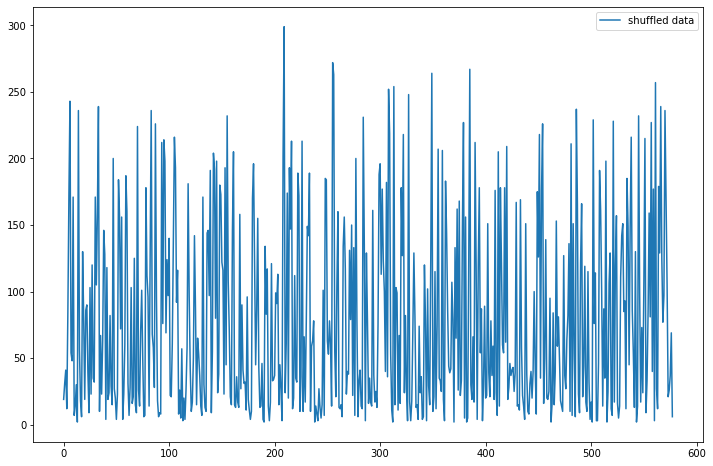

In [41]:
plt.figure(figsize=(12,8))

plt.plot(data_shuffle.index, data_shuffle['count'], label='shuffled data')
plt.legend(loc='best')
plt.show()

- Data observations are randomly shuffled
- Data must be sorted on the 'Date' column

In [42]:
data_shuffle['Date'] = pd.to_datetime(data_shuffle['Date'], format = '%Y-%m-%d')

ValueError: time data 2013:07:28 doesn't match format specified

In [43]:
from datetime import datetime

def date_format(date_string):
    for fmt in ('%Y-%m-%d', '%Y:%m:%d'):
        try: 
            return datetime.strptime(date_string, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [47]:
for i in range(len(data_shuffle)):
    data_shuffle['Date'][i] = date_format(data_shuffle['Date'][i])

In [60]:
data_shuffle.head()

,Date,count
0,2013-03-23 00:00:00,19
1,2013-03-05 00:00:00,31
2,2013-07-28 00:00:00,41
3,2012-12-27 00:00:00,12
4,2013-07-29 00:00:00,84


In [61]:
data_shuffle['Date'] = pd.to_datetime(data_shuffle['Date'], format = '%Y-%m-%d %H:%M:%s')
data_shuffle.dtypes

Date     datetime64[ns]
count             int64
dtype: object

In [63]:
(data_shuffle.sort_values(by='Date')).head()

,Date,count
113,2012-08-25,3
207,2012-08-26,3
13,2012-08-27,2
501,2012-08-28,2
370,2012-08-29,2


In [64]:
sorted_data = data_shuffle.sort_values(by='Date',ignore_index=True)

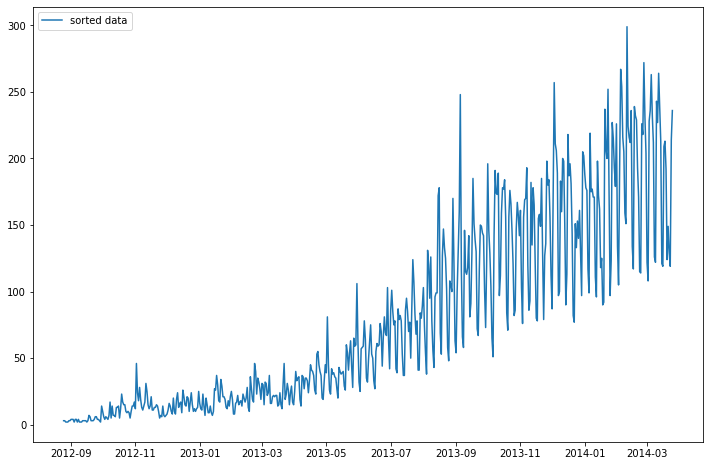

In [65]:
plt.figure(figsize=(12,8))

plt.plot(sorted_data.Date, sorted_data['count'], label='sorted data')
plt.legend(loc='best')
plt.show()